<a href="https://colab.research.google.com/github/muhammadalfateh6/-ALGORYC_Rep/blob/main/Yolo8_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd 

from pathlib import Path
from xml.dom.minidom import parse
from shutil import copyfile
import os

In [3]:
classes = ['helmet','head','person']

In [4]:
def convert_annot(size , box):
    x1 = int(box[0])
    y1 = int(box[1])
    x2 = int(box[2])
    y2 = int(box[3])

    dw = np.float32(1. / int(size[0]))
    dh = np.float32(1. / int(size[1]))

    w = x2 - x1
    h = y2 - y1
    x = x1 + (w / 2)
    y = y1 + (h / 2)

    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return [x, y, w, h]

In [5]:
def save_txt_file(img_jpg_file_name, size, img_box):
    save_file_name = '/content/drive/MyDrive/Project_250/Dataset/label/' +  img_jpg_file_name + '.txt'
    
    #file_path = open(save_file_name, "a+")
    with open(save_file_name ,'a+') as file_path:
        for box in img_box:

            cls_num = classes.index(box[0])

            new_box = convert_annot(size, box[1:])

            file_path.write(f"{cls_num} {new_box[0]} {new_box[1]} {new_box[2]} {new_box[3]}\n")

        file_path.flush()
        file_path.close()

In [6]:
def get_xml_data(file_path, img_xml_file):
    img_path = file_path + '/' + img_xml_file + '.xml'
    #print(img_path)

    dom = parse(img_path)
    root = dom.documentElement
    img_name = root.getElementsByTagName("filename")[0].childNodes[0].data
    img_size = root.getElementsByTagName("size")[0]
    objects = root.getElementsByTagName("object")
    img_w = img_size.getElementsByTagName("width")[0].childNodes[0].data
    img_h = img_size.getElementsByTagName("height")[0].childNodes[0].data
    img_c = img_size.getElementsByTagName("depth")[0].childNodes[0].data
   
    img_box = []
    for box in objects:
        cls_name = box.getElementsByTagName("name")[0].childNodes[0].data
        x1 = int(box.getElementsByTagName("xmin")[0].childNodes[0].data)
        y1 = int(box.getElementsByTagName("ymin")[0].childNodes[0].data)
        x2 = int(box.getElementsByTagName("xmax")[0].childNodes[0].data)
        y2 = int(box.getElementsByTagName("ymax")[0].childNodes[0].data)
        
        img_jpg_file_name = img_xml_file + '.jpg'
        img_box.append([cls_name, x1, y1, x2, y2])
  

    # test_dataset_box_feature(img_jpg_file_name, img_box)
    save_txt_file(img_xml_file, [img_w, img_h], img_box)

In [7]:
files = os.listdir('/content/drive/MyDrive/Project_250/Data_250/labels')
for file in files:
    file_xml = file.split(".")
    get_xml_data('/content/drive/MyDrive/Project_250/Data_250/labels', file_xml[0])
     

In [8]:
from sklearn.model_selection import train_test_split
image_list = os.listdir('/content/drive/MyDrive/Project_250/Data_250/images')
train_list, test_list = train_test_split(image_list, test_size=0.2, random_state=42)
val_list, test_list = train_test_split(test_list, test_size=0.5, random_state=42)
print('total =',len(image_list))
print('train :',len(train_list))
print('val   :',len(val_list))
print('test  :',len(test_list))

total = 250
train : 200
val   : 25
test  : 25


In [9]:
def copy_data(file_list, img_labels_root, imgs_source, mode):

    root_file = Path('/content/drive/MyDrive/Project_250/Dataset/image/'+  mode)
    if not root_file.exists():
        print(f"Path {root_file} does not exit")
        os.makedirs(root_file)

    root_file = Path('/content/drive/MyDrive/Project_250/Dataset/label/' + mode)
    if not root_file.exists():
        print(f"Path {root_file} does not exit")
        os.makedirs(root_file)

    for file in file_list:               
        img_name = file.replace('.png', '')        
        img_src_file = imgs_source + '/' + img_name + '.png'        
        label_src_file = img_labels_root + '/' + img_name + '.txt'

        #print(img_sor_file)
        #print(label_sor_file)
        # im = Image.open(rf"{img_sor_file}")
        # im.show()

        # Copy image
        DICT_DIR = '/content/drive/MyDrive/Project_250/Dataset/image/'  + mode
        img_dict_file = DICT_DIR + '/' + img_name + '.png'

        copyfile(img_src_file, img_dict_file)

        # Copy label
        DICT_DIR = '/content/drive/MyDrive/Project_250/Dataset/label/' + mode
        img_dict_file = DICT_DIR + '/' + img_name + '.txt'
        copyfile(label_src_file, img_dict_file)

In [10]:
copy_data(train_list, '/content/drive/MyDrive/Project_250/Dataset/label', '/content/drive/MyDrive/Project_250/Data_250/images', "train")
copy_data(val_list,   '/content/drive/MyDrive/Project_250/Dataset/label', '/content/drive/MyDrive/Project_250/Data_250/images', "val")
copy_data(test_list,  '/content/drive/MyDrive/Project_250/Dataset/label', '/content/drive/MyDrive/Project_250/Data_250/images', "test")

Path /content/drive/MyDrive/Project_250/Dataset/image/train does not exit
Path /content/drive/MyDrive/Project_250/Dataset/label/train does not exit
Path /content/drive/MyDrive/Project_250/Dataset/image/val does not exit
Path /content/drive/MyDrive/Project_250/Dataset/label/val does not exit
Path /content/drive/MyDrive/Project_250/Dataset/image/test does not exit
Path /content/drive/MyDrive/Project_250/Dataset/label/test does not exit


In [11]:
%cd /content/drive/MyDrive/Project_250
!git clone https://github.com/ultralytics/ultralytics

/content/drive/MyDrive/Project_250
Cloning into 'ultralytics'...
remote: Enumerating objects: 10468, done.
remote: Counting objects: 100% (234/234), done.
remote: Compressing objects: 100% (137/137), done.
remote: Total 10468 (delta 135), reused 164 (delta 97), pack-reused 10234
Receiving objects: 100% (10468/10468), 6.47 MiB | 13.72 MiB/s, done.
Resolving deltas: 100% (7127/7127), done.
Updating files: 100% (370/370), done.


In [4]:
%cd /content/drive/MyDrive/Object_Detection_P
!pip install ultralytics

/content/drive/MyDrive/Object_Detection_P
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 595.4/595.4 kB 12.4 MB/s eta 0:00:00


In [24]:
%cd /content/drive/MyDrive/Project_250

import yaml

config = {
   "path": "/content/drive/MyDrive/Project_250/Dataset/image",
   "train": "train",
   "val": "val",
   "test": "test",
   "nc": 3,
   "names": ['helmet','head','person']
}
with open("data9.yaml", "w") as file:
   yaml.dump(config, file, default_flow_style=False)

/content/drive/MyDrive/Project_250


In [5]:
!yolo task=detect mode=train data=/content/drive/MyDrive/Object_Detection_P/data_8.yaml model=yolov8s.pt epochs=30 lr0=0.01

Ultralytics YOLOv8.0.114 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Object_Detection_P/data_8.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimiz

In [27]:
!ls /content/drive/MyDrive/Project_250/runs/detect/train6

args.yaml					     R_curve.png
confusion_matrix_normalized.png			     results.csv
confusion_matrix.png				     results.png
events.out.tfevents.1686038906.f273c608a9ac.23382.0  train_batch0.jpg
F1_curve.png					     train_batch1.jpg
labels_correlogram.jpg				     train_batch2.jpg
labels.jpg					     val_batch0_labels.jpg
P_curve.png					     val_batch0_pred.jpg
PR_curve.png					     weights


In [6]:
from IPython.display import Image, clear_output
import matplotlib.pyplot as plt
%matplotlib inline

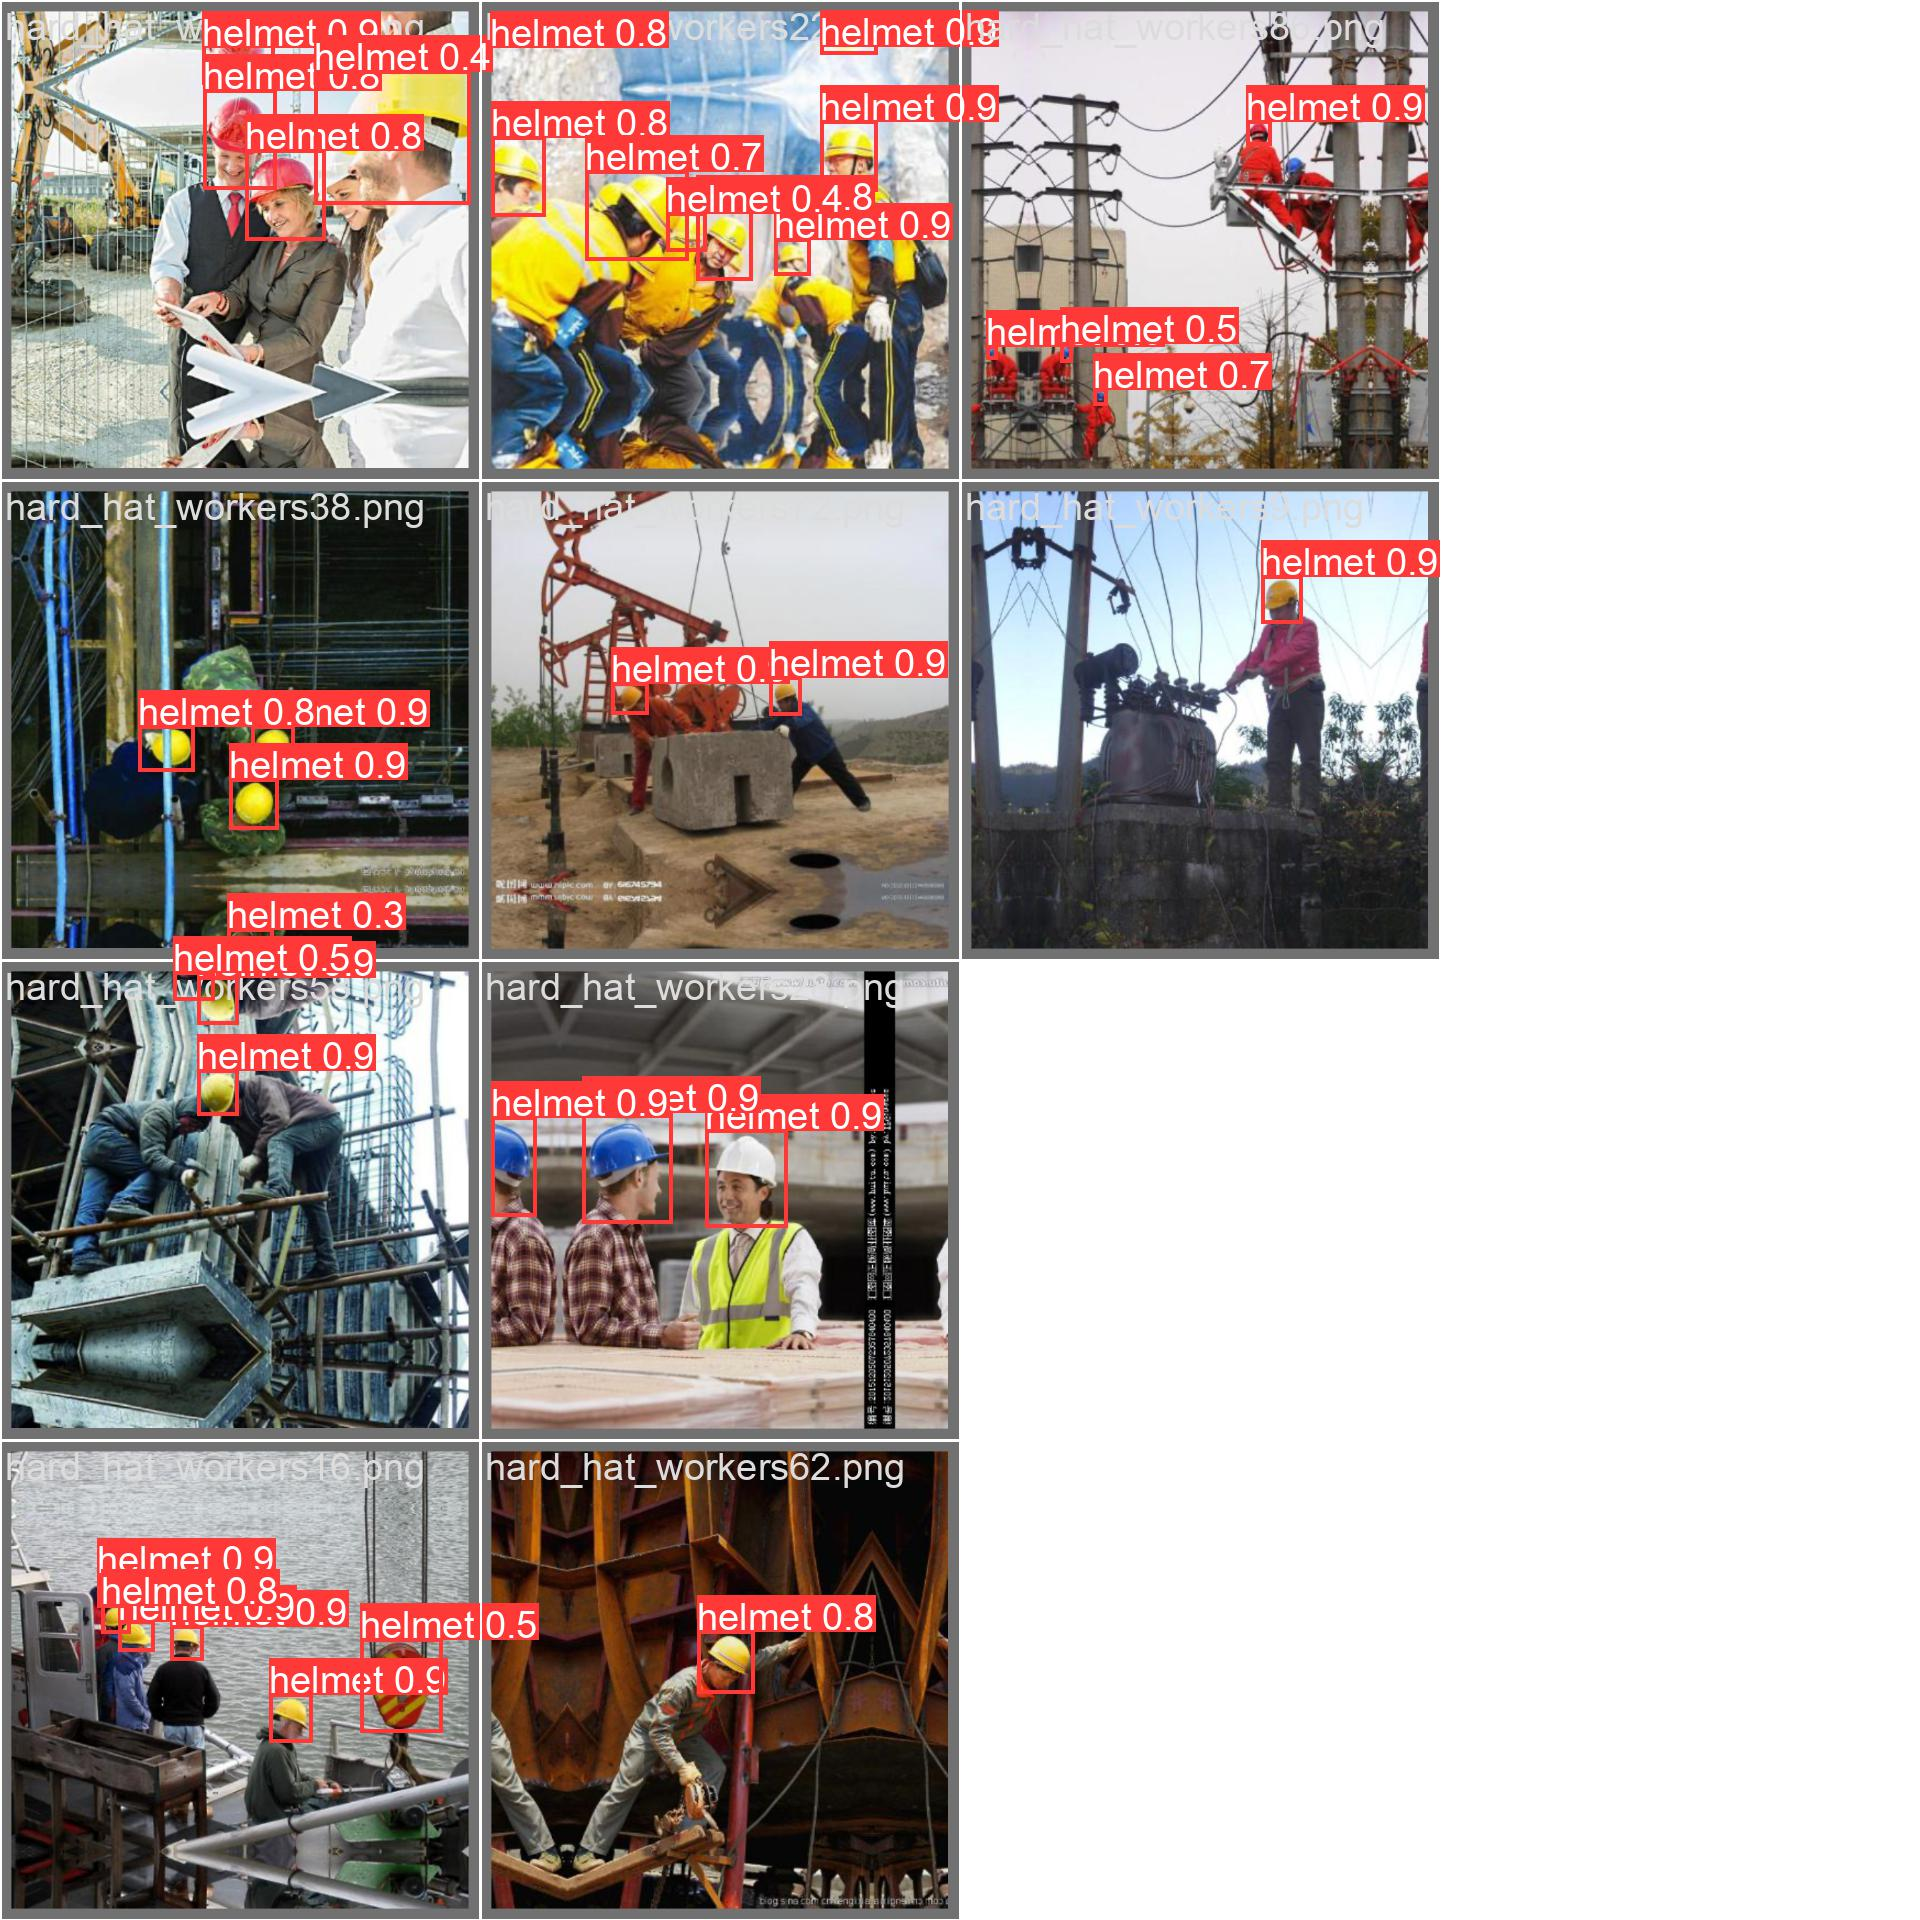

In [7]:
Image(filename='/content/drive/MyDrive/Object_Detection_P/runs/detect/train6/val_batch0_pred.jpg', width=1000)


In [30]:
from ultralytics import YOLO

# load a custom model
model = YOLO('/content/drive/MyDrive/Object_Detection_P/runs/detect/train6/weights/best.pt')  

# Predict with the model
# predict on an image
results = model('/content/hard_hat_workers896.png')  


image 1/1 /content/hard_hat_workers896.png: 640x640 2 helmets, 2 heads, 17.0ms
Speed: 3.4ms preprocess, 17.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


In [24]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

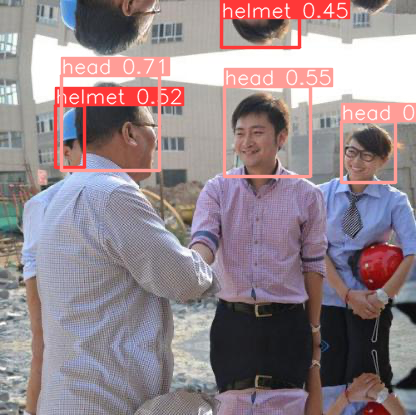

In [27]:
res_plotted = results[0].plot()
cv2_imshow(res_plotted)

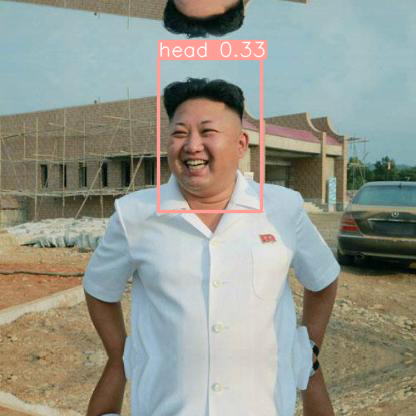

In [29]:
res_plotted = results[0].plot()
cv2_imshow(res_plotted)

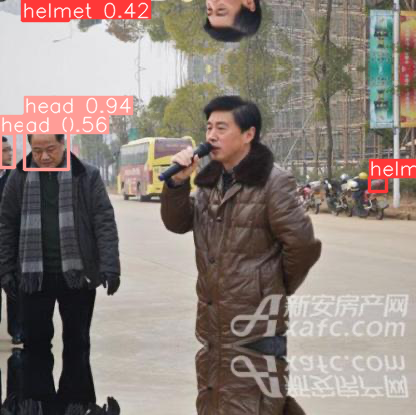

In [31]:
res_plotted = results[0].plot()
cv2_imshow(res_plotted)